<a href="https://colab.research.google.com/github/brandonkeung/Sepsis-Analysis/blob/main/Diagnosis_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [201]:
df = pd.read_csv('New.csv')

#print(df['concept_name'])

# mask = df['concept_name'].apply(lambda x: 'sepsis' in x)

# # update the 'concept_name' column to 1 where the sepsis is True, 0 otherwise
# df.loc[mask, 'concept_name'] = 1
# df.loc[~mask, 'concept_name'] = 0

# Male is 1 while Female is 0
df["gender"] = (df["gender"] == "M").astype(int)

# One-hot encoding for ethnicities
df['race_source_value'] = pd.factorize(df['race_source_value'])[0]
# print(pd.factorize(df['race_source_value']))

# print the updated dataframe
print(df)
#print(df['concept_name'].value_counts()[1])
df = df.sample(n=10000)
top_disease = ["acute renal failure syndrome", "congestive heart failure", "atrial fibrillation", "essential hypertension", "urinary tract infectious disease"]

for disease in top_disease:
    df[disease] = df.apply(lambda row: 1 if disease.lower() in row["disease"].lower() else 0, axis=1)

# unique_disease2 = set()
# for item in df["disease"]:
#     each_disease_set = set(map(str.lower, item.split(",")))
#     unique_disease2.update(each_disease_set)


#df = df.drop('urinary tract infectious disease', axis=1)

seps = []
for d in df["disease"]:
    #print(d.lower())
    if "sepsis" in d.lower():
        seps.append(1)
    else:
        seps.append(0)

print(len(seps))
df["sepsis"] = seps

df = df.drop('disease', axis=1)
df = df.drop('person_id', axis=1)
cols = df.columns
df




       person_id                                            disease  gender  \
0      392775850  Gastroesophageal reflux disease, Feces content...       0   
1      392775851  Disorder of pericardium, Acute renal failure s...       0   
2      392775852  Fall, Superficial injury to head, excluding ey...       1   
3      392775853  Gastrointestinal hemorrhage, Esophageal varice...       1   
4      392775854  Acquired hypothyroidism, Essential hypertensio...       0   
...          ...                                                ...     ...   
46511  392822365  Coronary arteriosclerosis, Anxiety state, Beni...       1   
46512  392822366  Compression of brain, Headache, Retention of u...       0   
46513  392822367  Not for resuscitation, Disseminated intravascu...       0   
46514  392822368  Spinal stenosis of lumbar region, Essential hy...       0   
46515  392822369  Trauma, Dehydration, Injury of ulnar nerve, Pa...       1   

       race_source_value  
0                      0

,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease,sepsis
34967,0,0,0,0,0,1,0,0
39647,0,5,0,0,0,0,1,0
37416,1,0,1,0,0,0,0,0
42734,0,0,0,1,1,1,0,0
2412,1,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
35758,1,16,0,0,0,0,0,0
12131,1,0,0,0,0,1,0,0
36164,1,0,0,0,0,0,0,0
9287,1,0,0,0,0,1,0,0


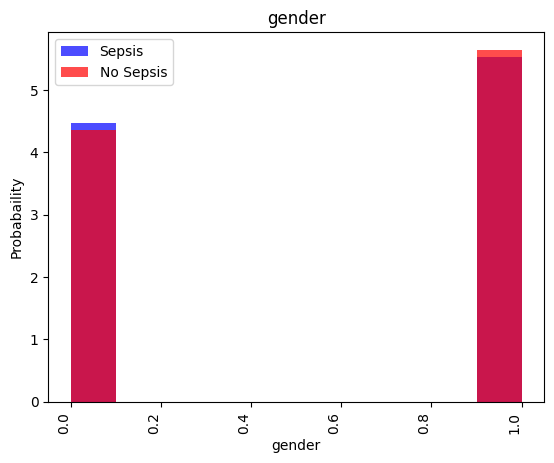

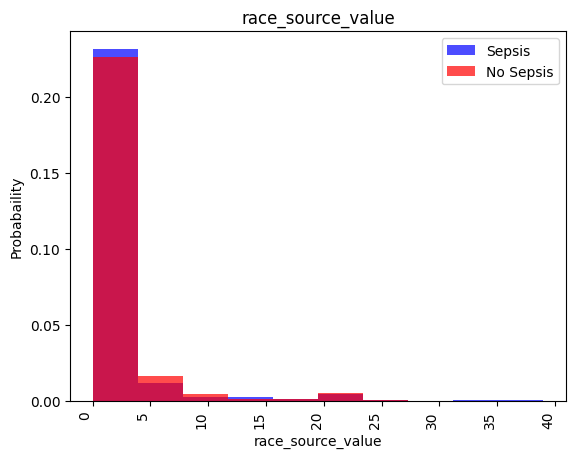

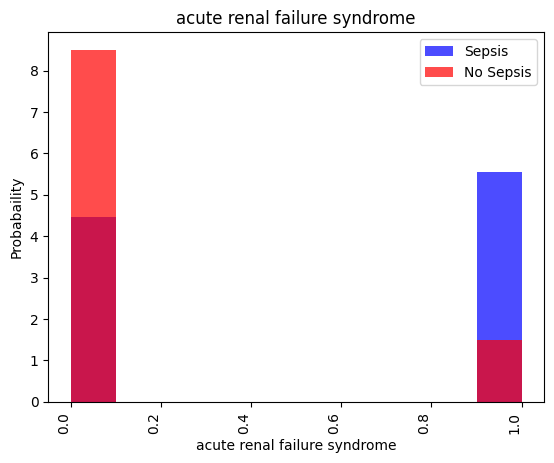

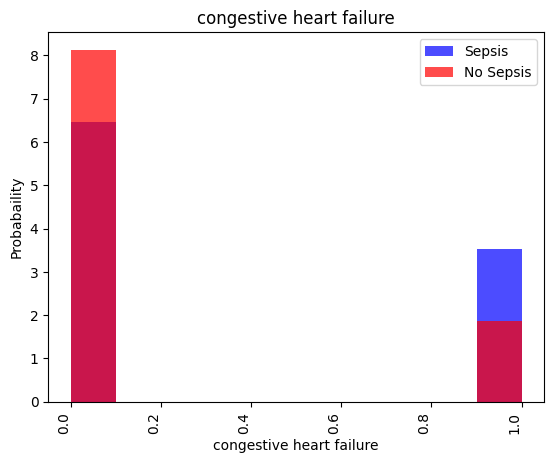

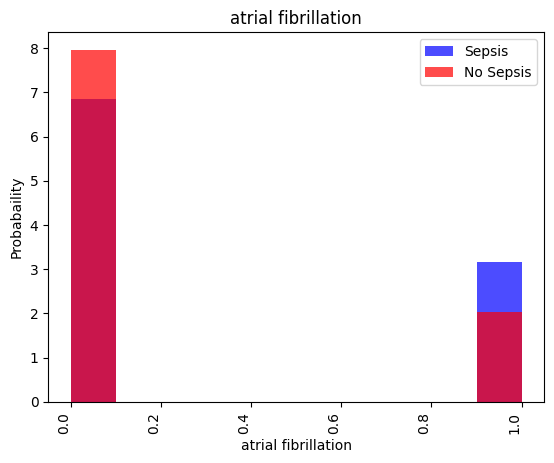

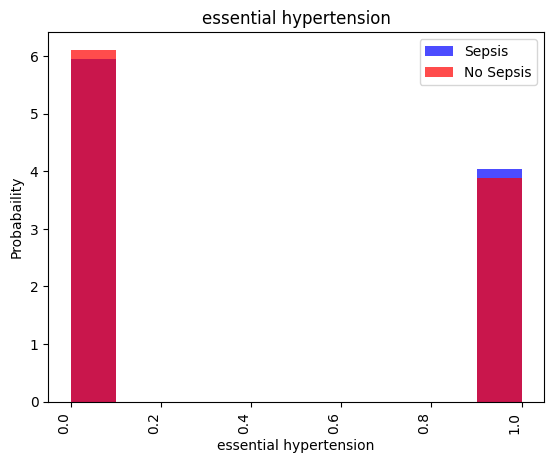

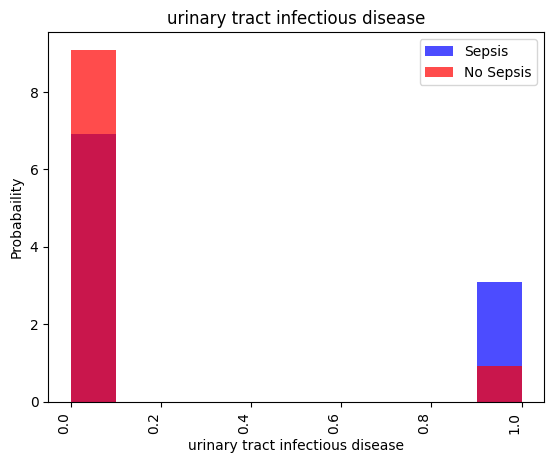

In [202]:
for label in cols[:-1]:
  plt.hist(df[df["sepsis"]==1][label], color='blue', label='Sepsis', alpha=0.7, density=True)
  plt.hist(df[df["sepsis"] == 0][label], color='red', label='No Sepsis', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probabaility")
  plt.xlabel(label)
  plt.xticks(rotation=90, ha='right')
  plt.legend()
  plt.show()

In [203]:
# segments portions of dat as train, valid, and test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [204]:
# scales inputs so that they are relative to mean and standrad deviation of specific columns
# note: upper case variable name refers to matrices while lower case variable names refer to 1D arrays
# oversample=True makes it so equal amounts of gamma and hadron are in the training datasets
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Convert labels to integers
    le = LabelEncoder()
    y = le.fit_transform(y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (len(y), 1))))

    return data, X, y

In [205]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
# do not want to oversample because want to see if our model is accurate
test, X_test, y_test = scale_dataset(test, oversample=False) 

#KNN Model


In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [116]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [117]:
y_pred = knn_model.predict(X_test)

In [118]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [119]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.32      1733
           1       0.12      0.73      0.21       267

    accuracy                           0.27      2000
   macro avg       0.47      0.46      0.26      2000
weighted avg       0.73      0.27      0.30      2000



In [121]:
print(accuracy_score(y_test, y_pred))

0.267


In [122]:
print(roc_auc_score(y_test, y_pred))

0.4629758099548098


#Decision Tree

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf = RandomForestClassifier(max_depth=3)

In [211]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [212]:
y_pred = clf.predict(X_test)

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1733
           1       0.35      0.69      0.46       267

    accuracy                           0.79      2000
   macro avg       0.65      0.74      0.66      2000
weighted avg       0.86      0.79      0.81      2000



In [214]:
clf.feature_importances_

array([0.00527705, 0.02250656, 0.54050655, 0.0916686 , 0.05049375,
       0.00804551, 0.28150198])

#SVM Model


In [132]:
from sklearn.svm import SVC

In [133]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [134]:

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1733
           1       0.29      0.64      0.40       267

    accuracy                           0.74      2000
   macro avg       0.61      0.70      0.62      2000
weighted avg       0.85      0.74      0.78      2000



#Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression 

In [197]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [198]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1732
           1       0.34      0.68      0.45       268

    accuracy                           0.78      2000
   macro avg       0.64      0.74      0.66      2000
weighted avg       0.86      0.78      0.81      2000



In [199]:
lg_model.coef_

array([[-0.09863127, -0.00811625,  0.75891681,  0.10035952,  0.12231874,
        -0.10583423,  0.39821712]])

#Neural Network

In [126]:
import tensorflow as tf

In [127]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

# combination of the above two functions
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [128]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.005, batch size 32


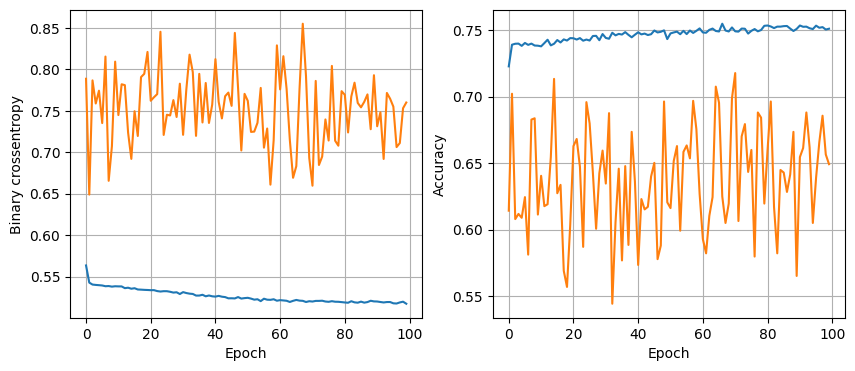

108/108 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6865
16 nodes, dropout 0, lr 0.005, batch size 64


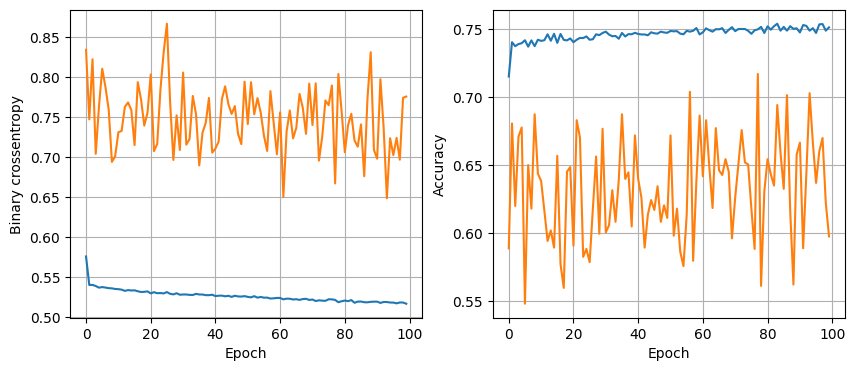

108/108 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6659
16 nodes, dropout 0, lr 0.005, batch size 128


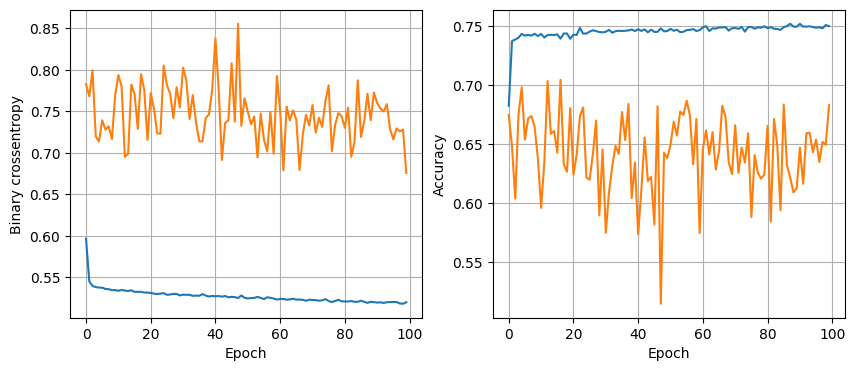

108/108 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6946
16 nodes, dropout 0, lr 0.001, batch size 32


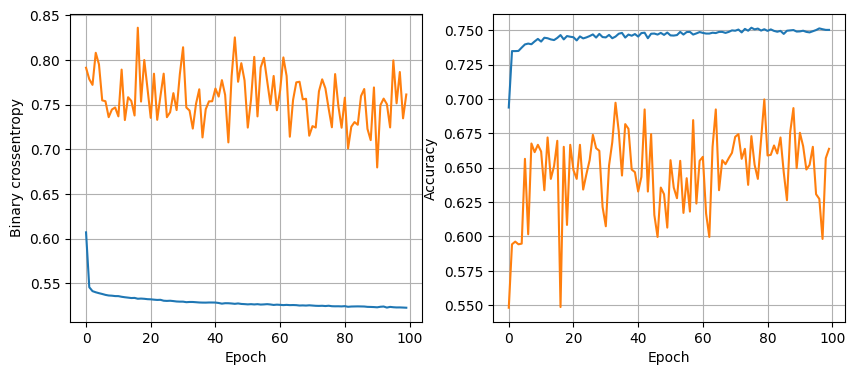

108/108 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6932
16 nodes, dropout 0, lr 0.001, batch size 64


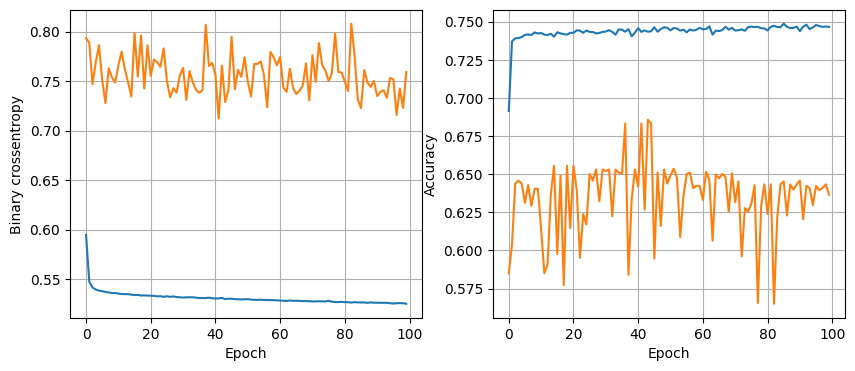

108/108 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.7036
16 nodes, dropout 0, lr 0.001, batch size 128


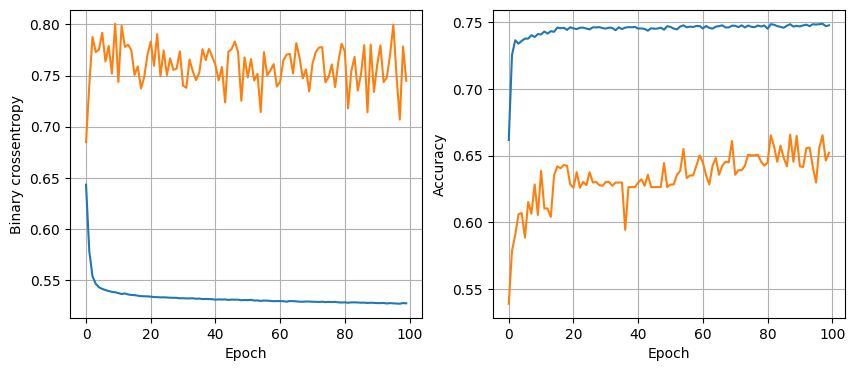

108/108 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6943
16 nodes, dropout 0.2, lr 0.005, batch size 32


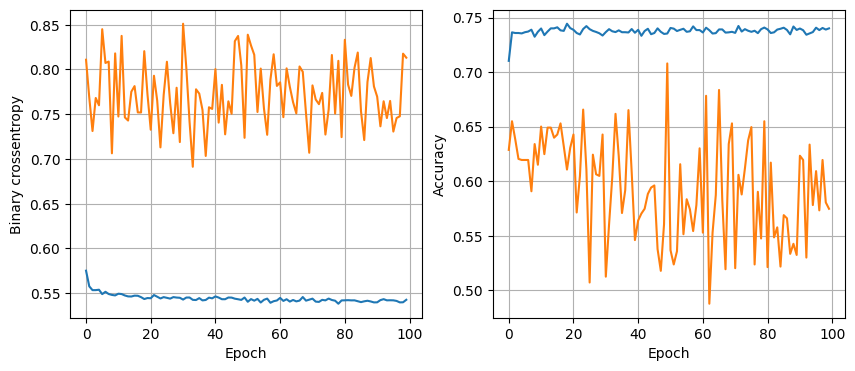

108/108 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6673
16 nodes, dropout 0.2, lr 0.005, batch size 64


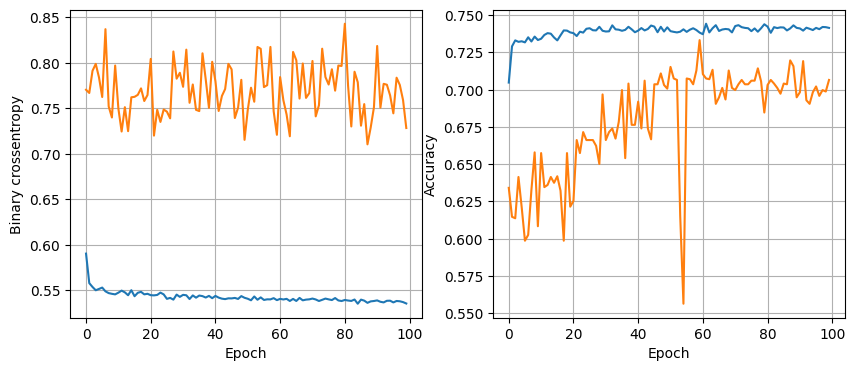

108/108 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.6981
16 nodes, dropout 0.2, lr 0.005, batch size 128


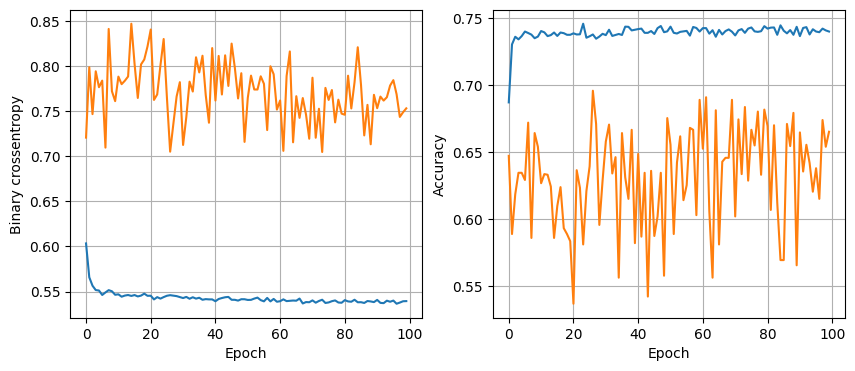

108/108 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6810
16 nodes, dropout 0.2, lr 0.001, batch size 32


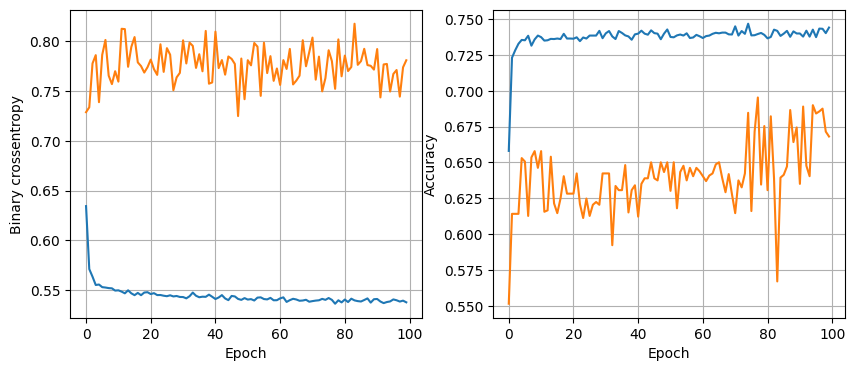

108/108 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.7036
16 nodes, dropout 0.2, lr 0.001, batch size 64


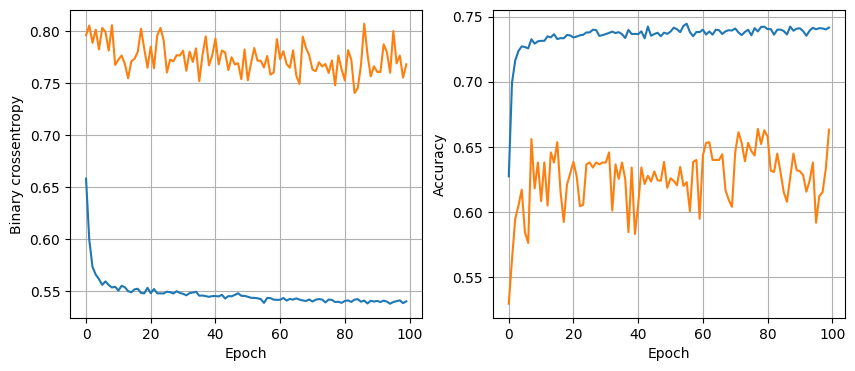

108/108 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6842
16 nodes, dropout 0.2, lr 0.001, batch size 128


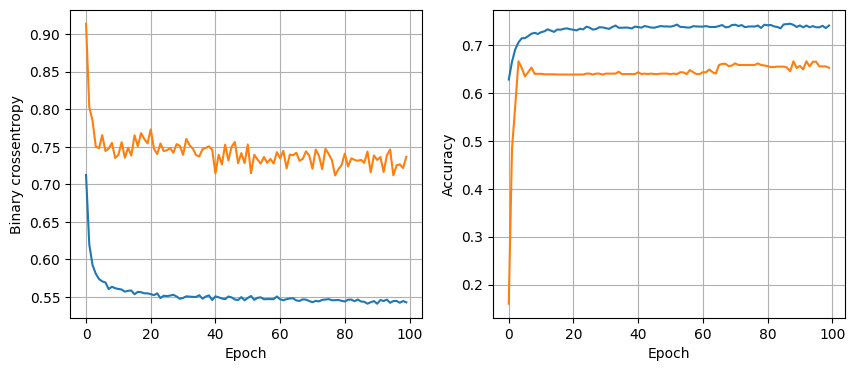

108/108 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7027
32 nodes, dropout 0, lr 0.005, batch size 32


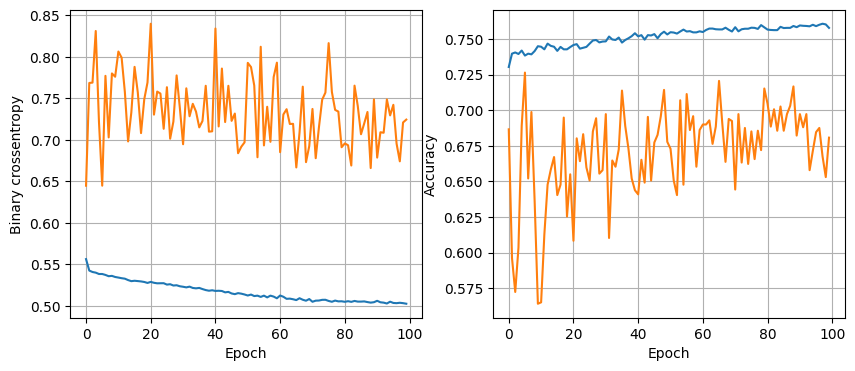

108/108 [==============================] - 0s 3ms/step - loss: 0.7658 - accuracy: 0.6905
32 nodes, dropout 0, lr 0.005, batch size 64


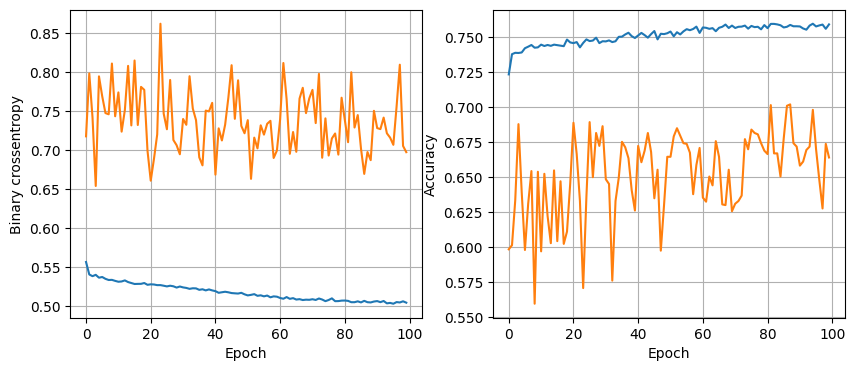

108/108 [==============================] - 0s 3ms/step - loss: 0.7439 - accuracy: 0.6972
32 nodes, dropout 0, lr 0.005, batch size 128


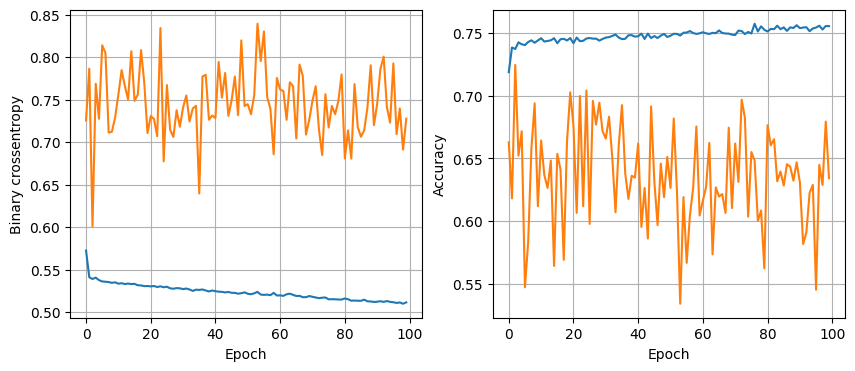

108/108 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6917
32 nodes, dropout 0, lr 0.001, batch size 32


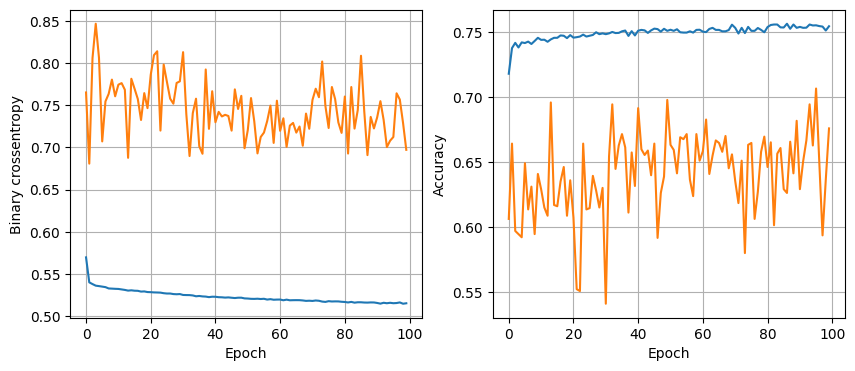

108/108 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.7004
32 nodes, dropout 0, lr 0.001, batch size 64


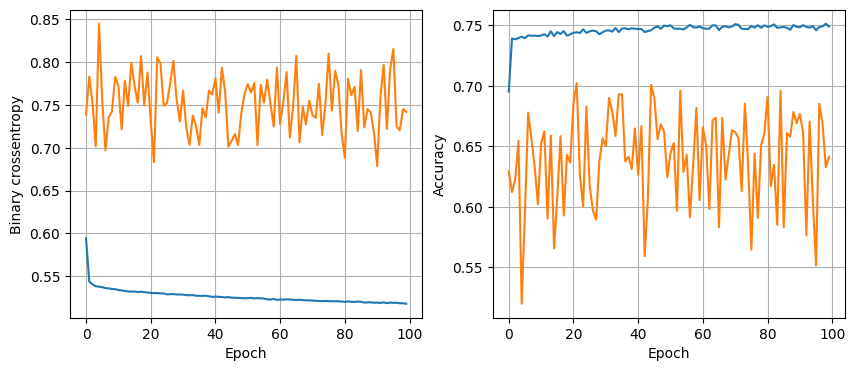

108/108 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6914
32 nodes, dropout 0, lr 0.001, batch size 128


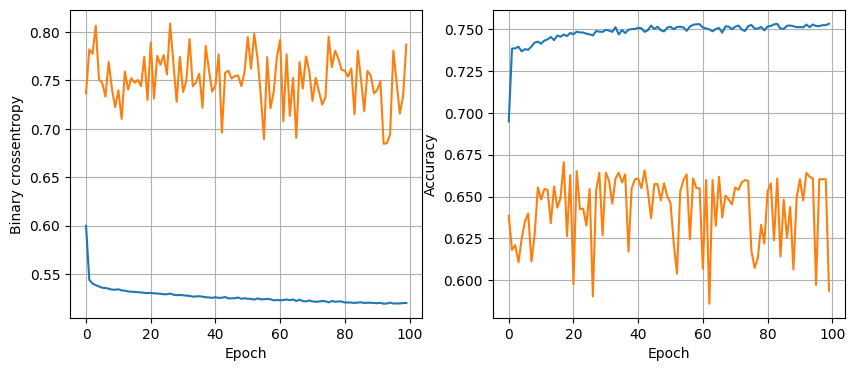

108/108 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6760
32 nodes, dropout 0.2, lr 0.005, batch size 32


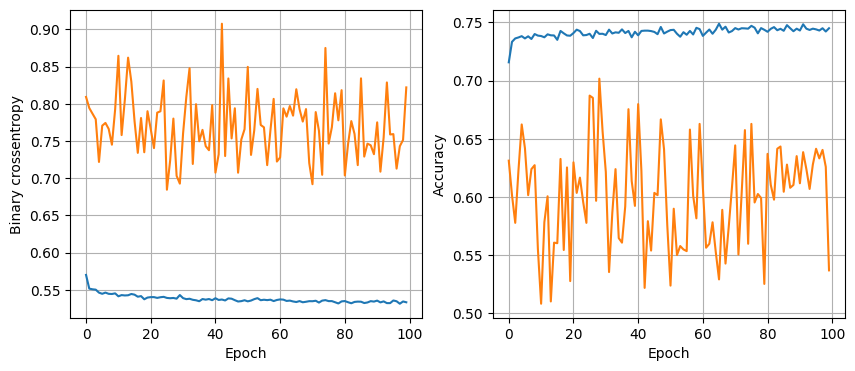

108/108 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.6671
32 nodes, dropout 0.2, lr 0.005, batch size 64


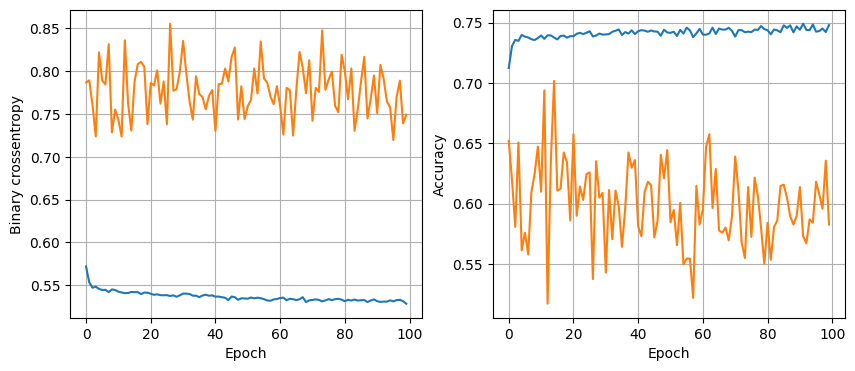

108/108 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6871
32 nodes, dropout 0.2, lr 0.005, batch size 128


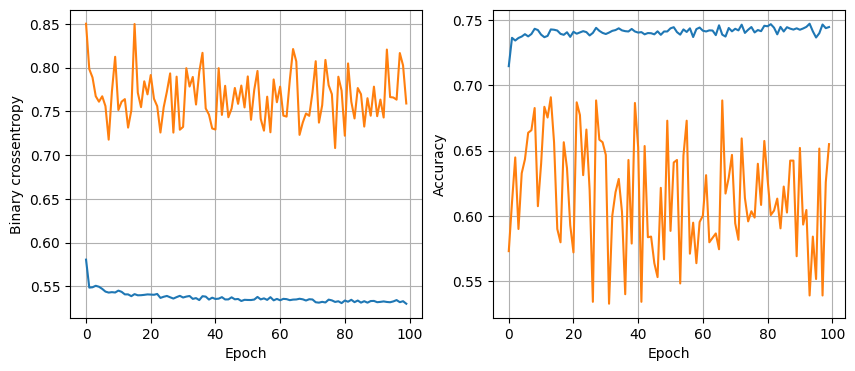

108/108 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6845
32 nodes, dropout 0.2, lr 0.001, batch size 32


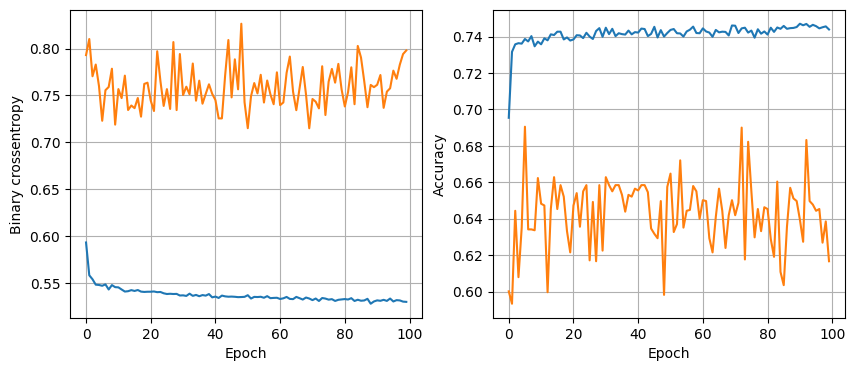

108/108 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6882
32 nodes, dropout 0.2, lr 0.001, batch size 64


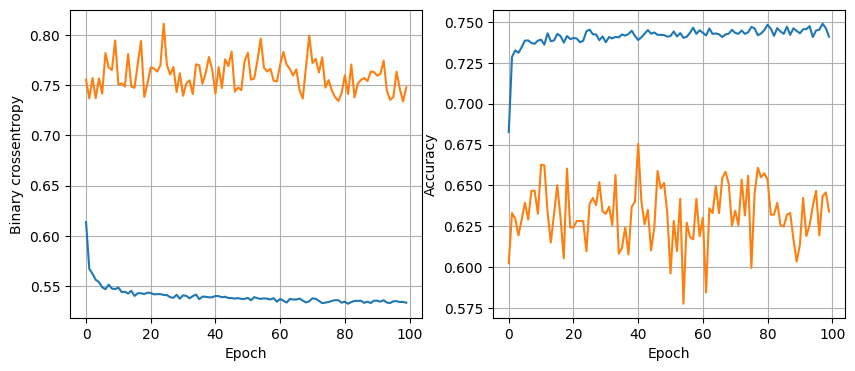

108/108 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.6975
32 nodes, dropout 0.2, lr 0.001, batch size 128


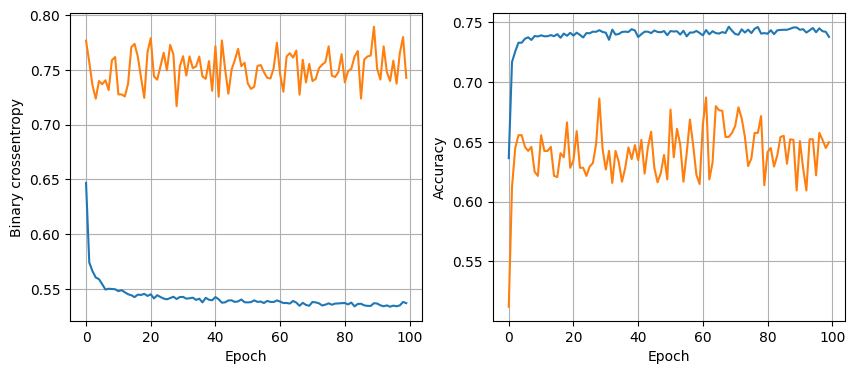

108/108 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6952


In [129]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [130]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) # flatten into 1D array

63/63 [==============================] - 0s 2ms/step


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1733
           1       0.32      0.61      0.42       267

    accuracy                           0.78      2000
   macro avg       0.63      0.71      0.64      2000
weighted avg       0.85      0.78      0.80      2000



#XGBoost


In [168]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [169]:
classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3
    )

In [170]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [171]:
y_pred = classifier.predict(X_test)

In [172]:
mean_squared_error(y_pred, y_test)

0.26

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1733
           1       0.30      0.69      0.41       267

    accuracy                           0.74      2000
   macro avg       0.62      0.72      0.62      2000
weighted avg       0.85      0.74      0.78      2000



In [174]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [175]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [176]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=df.columns[:-1])

,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease
0,0.011773,0.012852,0.633104,0.109125,0.014815,0.023854,0.194478


In [177]:
y_pred = regressor.predict(X_test)

In [178]:
mean_squared_error(y_test, y_pred)

0.18663814980682822

In [179]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) # flatten into 1D array

63/63 [==============================] - 0s 2ms/step


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1733
           1       0.32      0.61      0.42       267

    accuracy                           0.78      2000
   macro avg       0.63      0.71      0.64      2000
weighted avg       0.85      0.78      0.80      2000



In [184]:
pd.DataFrame(classifier.feature_importances_.reshape(1, -1), columns=df.columns[:-1])

,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease
0,0.013144,0.010059,0.636395,0.095359,0.021167,0.022774,0.201102
